Import relevant libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import statsmodels.api as sm
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rc('xtick', labelsize=20)
mpl.rc('ytick', labelsize=20)
mpl.rc('axes', labelsize=20)
mpl.rc('axes', titlesize=20)

Clean the data

In [4]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df_na=df[df.isna().any(axis=1)]
data_left = 100 - len(df_na)/len(df)*100
print(data_left)

96.0665362035225


In [6]:
df_nonull = df.dropna()
len(df_nonull)

4909

In [7]:
df_nonull.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
df_nonull.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


Create a subset of numerical values

In [9]:
col1=df_nonull.select_dtypes(np.number)
col1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
5,56669,81.0,0,0,186.21,29.0,1


Identify outliers using boxplot

<AxesSubplot:>

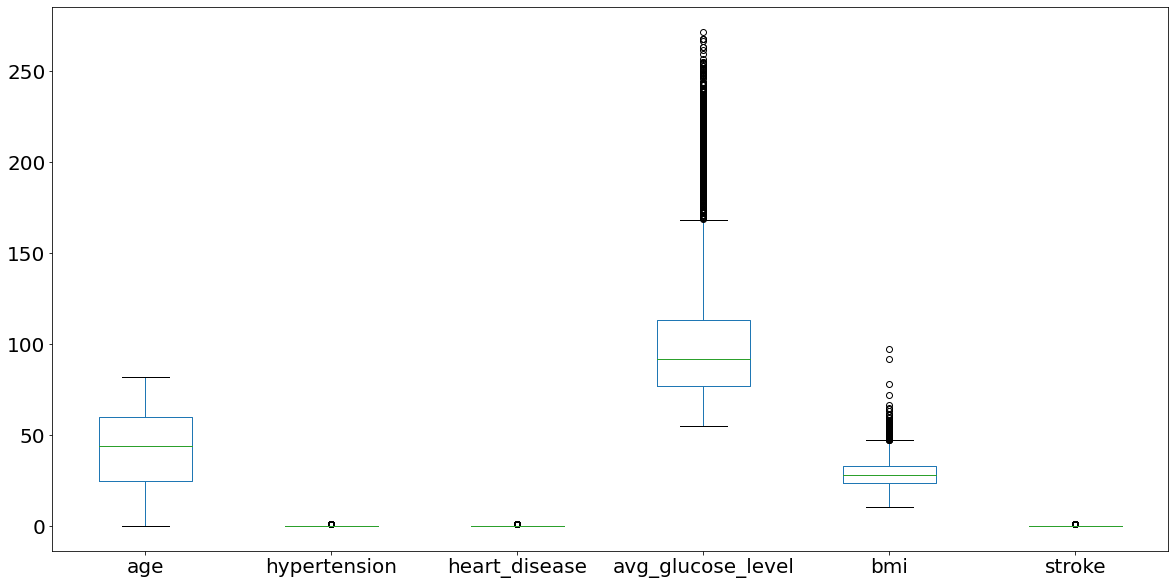

In [10]:
col2 = col1.drop(['id'], axis=1)
col2.plot.box()

In [11]:
#Interquartile range function

Q1 = col2.quantile(0.25)
Q3 = col2.quantile(0.75)
IQR = Q3 -Q1
Q1

age                  25.00
hypertension          0.00
heart_disease         0.00
avg_glucose_level    77.07
bmi                  23.50
stroke                0.00
Name: 0.25, dtype: float64

In [10]:
#remove outliers

low_boundary= Q1 - 1.5*IQR
high_boundary= Q3+ 1.5*IQR
df_nooutliers = col2[~((col2<low_boundary )| (col2 >high_boundary)).any(axis=1)]
#df_nooutliers.plot.box(figsize=(20,10))
print("HIGH BOUNDARY", high_boundary)

print("LOW BOUNDARY", low_boundary)

print("Q3", Q3)

print("Q1", Q1)

HIGH BOUNDARY age                  112.50
hypertension           0.00
heart_disease          0.00
avg_glucose_level    168.32
bmi                   47.50
stroke                 0.00
dtype: float64
LOW BOUNDARY age                 -27.50
hypertension          0.00
heart_disease         0.00
avg_glucose_level    22.32
bmi                   9.10
stroke                0.00
dtype: float64
Q3 age                   60.00
hypertension           0.00
heart_disease          0.00
avg_glucose_level    113.57
bmi                   33.10
stroke                 0.00
Name: 0.75, dtype: float64
Q1 age                  25.00
hypertension          0.00
heart_disease         0.00
avg_glucose_level    77.07
bmi                  23.50
stroke                0.00
Name: 0.25, dtype: float64


What is the correlation bewtween age, hypertension, heart disease, avg glucose, bmi and stroke?

In [13]:
df_corr= col2.corr()
df_corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


Correlation between the age, hypertension, heart disease, average glucose level, bmi and stroke

<AxesSubplot:>

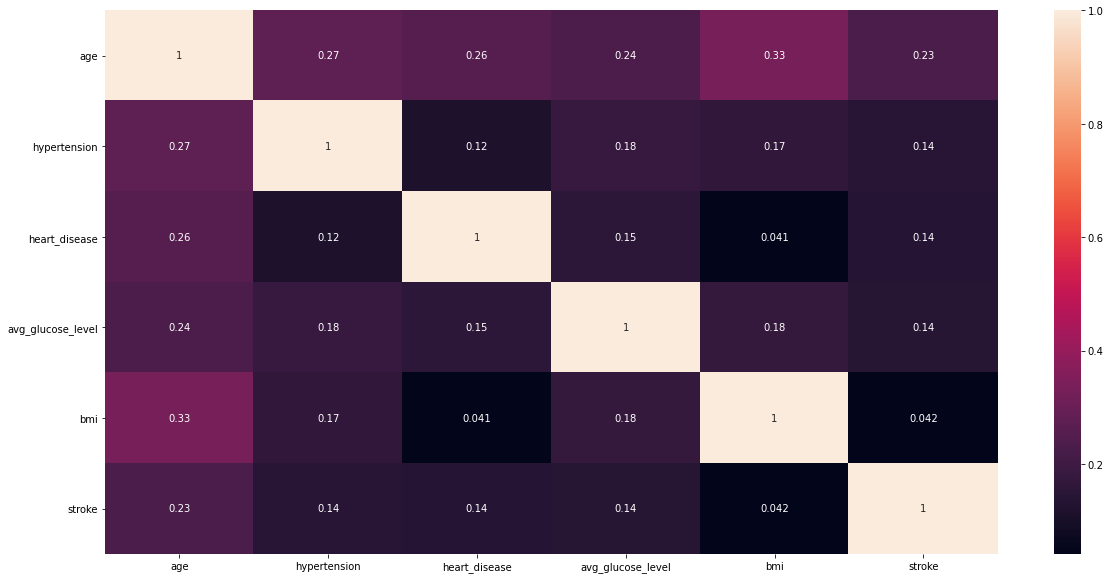

In [43]:
sns.heatmap(df_corr, annot=True)

In [14]:
df_corr.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374


Plot the coefficients for each variable

In [17]:
df_corr1= df_corr.drop(['stroke'])

Text(0.5, 1.0, 'Relationship between stroke and patient metrics')

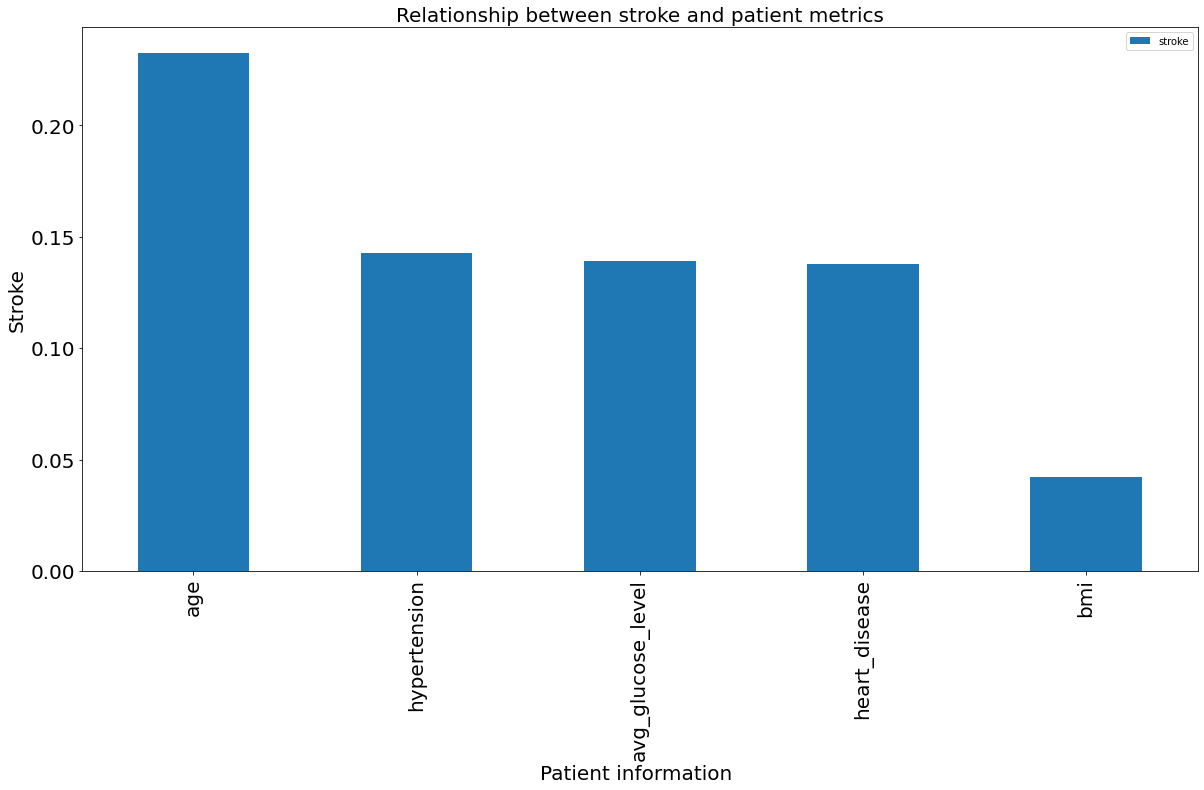

In [39]:
#df_corr1= df_corr.drop['stroke']
df_corr1sorted = df_corr1.sort_values(by= 'stroke', ascending =False)
fig= df_corr1sorted.plot.bar(y="stroke")
plt.xlabel('Patient information ')
plt.ylabel('Stroke')
plt.title('Relationship between stroke and patient metrics')